1. Enhance contrast
2. Have different scales represented with Gaussian filter
3. Identify and segment edges (try Sobel and Canny) - Do for multi-orientation. Plus edge thinning ?
4. Fill inside the edges (Closing - different parameters for different scales) 

Sauvola?
pyramid gaussia
connexité ?

In [1]:
import numpy as np
from skimage.morphology import erosion, dilation, binary_erosion, opening, closing, white_tophat, reconstruction, black_tophat, skeletonize, convex_hull_image, thin, extrema
from skimage.morphology import square, diamond, octagon, rectangle, star, disk, label
from skimage.segmentation import watershed
from skimage import exposure, feature, morphology
from skimage.filters.rank import entropy, enhance_contrast_percentile
from skimage.filters import gaussian
from skimage import color
from PIL import Image
from scipy import ndimage as ndi
from skimage.util import img_as_ubyte
import math
from skimage import data, filters
from matplotlib import pyplot as plt

from script_tp2 import *

# 1. Improving contrast distribution

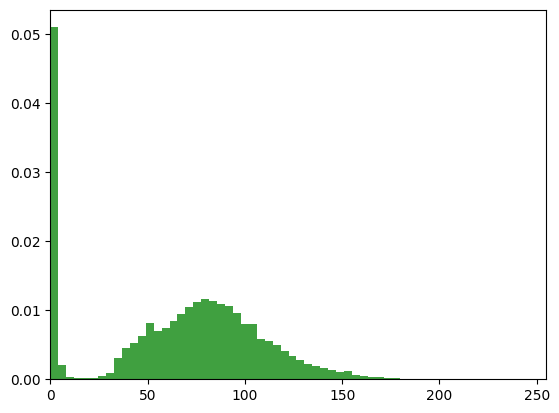

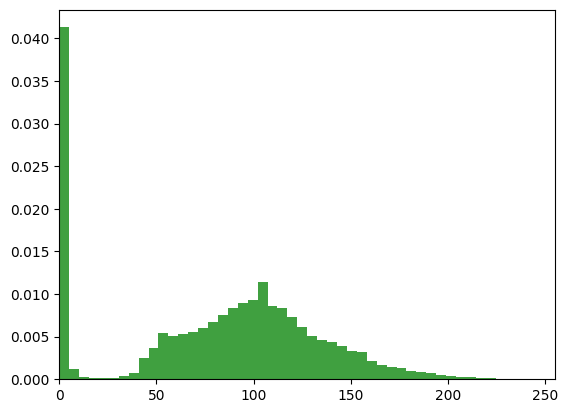

In [2]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_mask = masking(img)
plt.hist(img.ravel(), 50, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 255])
plt.show()

# rescale image
img_rescaled = img
img_rescaled[img_mask == 1] = exposure.rescale_intensity(img[img_mask == 1])
plt.hist(img_rescaled.ravel(), 50, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 255])
plt.show()

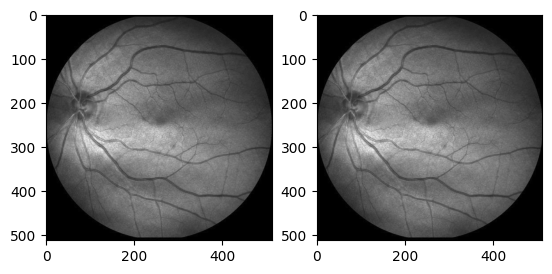

In [3]:
plt.subplot(121)
plt.imshow(img, cmap='grey')
plt.subplot(122)
plt.imshow(img_rescaled, cmap='grey');

# 2. Apply gaussian filter

In [4]:
sigma = 3
img_gaussian = gaussian(img_rescaled, sigma=sigma)

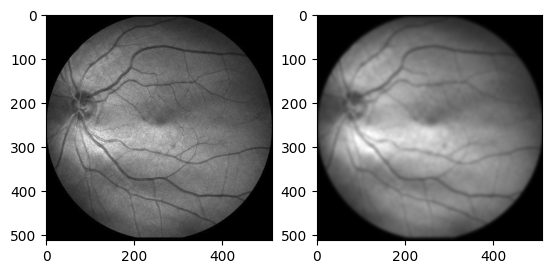

In [5]:
plt.subplot(121)
plt.imshow(img_rescaled, cmap='grey')
plt.subplot(122)
plt.imshow(img_gaussian, cmap='grey');

# 3. Detect edges with Canny filter

In [6]:
img_edges_canny = feature.canny(img_rescaled, sigma=3, low_threshold=0.7, high_threshold=0.8, use_quantiles=True, mask = img_mask)
#img_edges_canny = morphology.black_tophat(img_rescaled, disk(10))


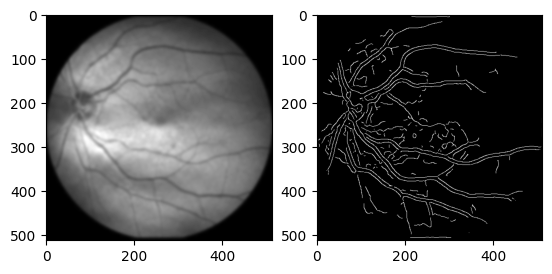

In [7]:
plt.subplot(121)
plt.imshow(img_gaussian, cmap='grey')
plt.subplot(122)
plt.imshow(img_edges_canny, cmap='grey');

# 4. Thin edges

In [8]:
img_thin = morphology.thin(img_edges_canny)

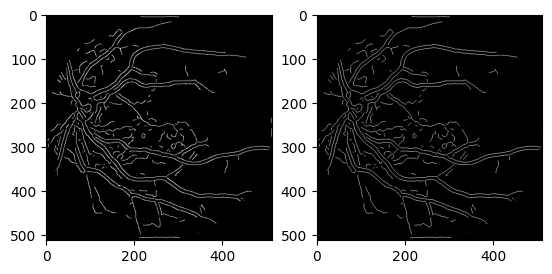

In [9]:
plt.subplot(121)
plt.imshow(img_edges_canny, cmap='grey')
plt.subplot(122)
plt.imshow(img_thin, cmap='grey');

# 5. Closing

In [28]:
dilation_disk = 5
img_dilation = morphology.dilation(img_thin, disk(dilation_disk))

erosion_disk = 1
img_closing = morphology.erosion(img_dilation, disk(erosion_disk))

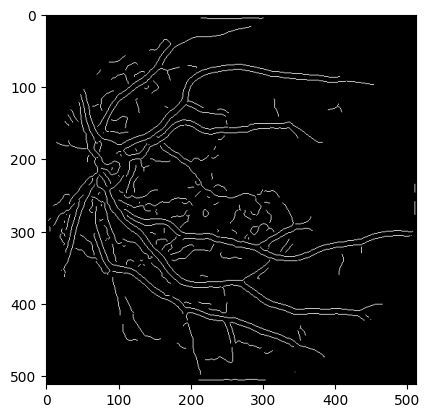

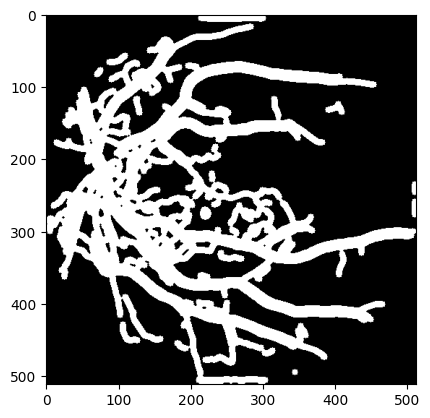

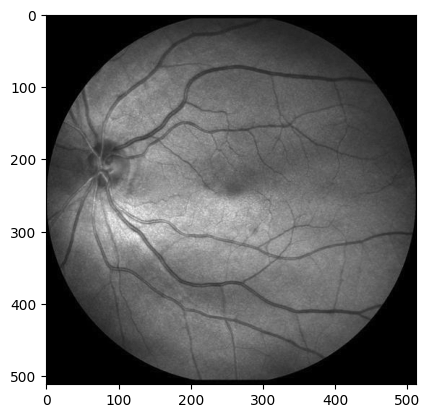

In [29]:
plt.imshow(img_thin, cmap='grey')
plt.show()
plt.imshow(img_closing, cmap='grey')
plt.show()
plt.imshow(img, cmap='grey')
plt.show()

# 6. Evaluate

In [30]:
img_out = img_closing
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

0.41272860277980983
0.6932907348242812
0.5174247982391783


Improvements:
Post-processing: After segmentation, consider additional post-processing steps such as noise removal, small object removal, and smoothing to improve the segmentation results.

Multi-scale veins:

Scale-Space Analysis: Veins may appear at different scales in the image. You can perform scale-space analysis by applying Gaussian smoothing at multiple scales (gaussian_laplace or gaussian_filter with different sigma values) and then combining the results to capture veins at different scales.
Multi-scale Filtering: Instead of using a single scale for Gaussian smoothing, consider using a bank of filters with different scales (e.g., Difference of Gaussians or Gaussian derivatives) to enhance veins at multiple scales simultaneously.

Multi-orientation veins:

Directional Filters: Veins may have varying orientations across the image. You can use directional filters (e.g., Gabor filters) with different orientations to enhance veins in different directions.
Orientation Estimation: Estimate the local orientation of veins using techniques like structure tensor analysis or gradient-based methods, and then adapt your segmentation approach (e.g., morphological operations) based on the estimated orientation to better capture veins of different orientations.